BDDA Project

Made By: Group 7

Swapnil Malik-015016

Sumit Gupta- 015022

Muskan Jain- 015034

Pragya Jain- 015038

Sarthak Kumar- 015042


In [2]:
# Loading packages 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import datetime as dt # for date and time manipulation

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # data visualization
init_notebook_mode(connected=True)

# Input data files are available in the "../input/" directory.
import os


In [3]:
# 2.0 Import warnings module
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

# 1. Exploratory Data Analysis and Visualization

In [4]:
# Loading dataset train, test and store
train=pd.read_csv("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\BDDA\\Projects\\Rossman store sales\\train.csv")
test=pd.read_csv("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\BDDA\\Projects\\Rossman store sales\\test.csv")
store=pd.read_csv("C:\\Users\\Sumit\\Desktop\\Sumit Gupta\\MBA Study Material\\Term-4\\BDDA\\Projects\\Rossman store sales\\store.csv")

In [5]:
# Looking into each dataset size
print('training dataset shape',train.shape)
print('testing dataset shape',test.shape)
print('store dataset shape',store.shape)

training dataset shape (1017209, 9)
testing dataset shape (41088, 8)
store dataset shape (1115, 10)


In [6]:
# train dataset
train.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [7]:
# test dataset
test.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [8]:
# store dataset
store.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [9]:
# Samples having 0 sales 
print('Sample having 0 sales :',train[train['Sales']<=0].shape,'\n')
print('Store Open : 1,','Store Closed : 0')
print(train['Open'].value_counts(),'\n')
print('Sample having closed store and sale is 0 :',train[(train['Sales']<=0)&(train['Open']==0)].shape)

Sample having 0 sales : (172871, 9) 

Store Open : 1, Store Closed : 0
1    844392
0    172817
Name: Open, dtype: int64 

Sample having closed store and sale is 0 : (172817, 9)


* The train dataset have total 172817 samples having 0 sale and the store is closed. Model is building to predict the sale, therefore getting rid of irrelevant samples 

In [10]:
# making new train dataset having sales greater than zero
train=train[train['Sales']>0]
print('New training dataset shape',train.shape)

New training dataset shape (844338, 9)


In [11]:
# basic information about columns of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Open           844338 non-null  int64 
 6   Promo          844338 non-null  int64 
 7   StateHoliday   844338 non-null  object
 8   SchoolHoliday  844338 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 64.4+ MB


* Date column having date information but is of object type, so have to convert into datetime format 
* Dataset does not cantain any missing values

In [12]:
# Converting into datetime format 
train['Date']=pd.to_datetime(train['Date'])
train.sort_values(by='Date',ascending=True,inplace=True)
train.reset_index(inplace=True)
train.drop('index',axis=1,inplace=True)

# Start date record in dataset
start_date=train['Date'][0]
print('Start date :',start_date)

# End date record in dataset
end_date=train['Date'][844337]
print('End date :',end_date)

Start date : 2013-01-01 00:00:00
End date : 2015-07-31 00:00:00


In [13]:
# unique values of categorical columns 
for i in ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']:
    print( i+':',train[i].unique())

DayOfWeek: [2 3 4 5 6 7 1]
Open: [1]
Promo: [0 1]
StateHoliday: ['a' '0' 'b' 'c' 0]
SchoolHoliday: [1 0]


* Open column having only 1 value so no need of this column
* StateHoliday column having two identical values but in different format so need to deal with this 

In [14]:
# Droping 'Open' column and making correction in 'StateHoliday' column
index=train[train['StateHoliday']==0].index
train['StateHoliday'][index]='0'
train['StateHoliday'].value_counts()
train.drop('Open',axis=1,inplace=True)

# Note : I have converted numeric into string format in StateHoliday column because majority of variables are in string format

In [15]:
# Checking for negative values
pd.options.display.float_format = '{:.0f}'.format # in order to round up the numbers 
train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844338,844338,844338,844338,844338,844338
mean,558,4,6956,763,0,0
std,322,2,3104,401,0,0
min,1,1,46,8,0,0
25%,280,2,4859,519,0,0
50%,558,3,6369,676,0,0
75%,837,5,8360,893,1,0
max,1115,7,41551,7388,1,1


* We don't have negative values in dataset, therefore dataset is very clean

### 1.1 Visualization based on Days of Week

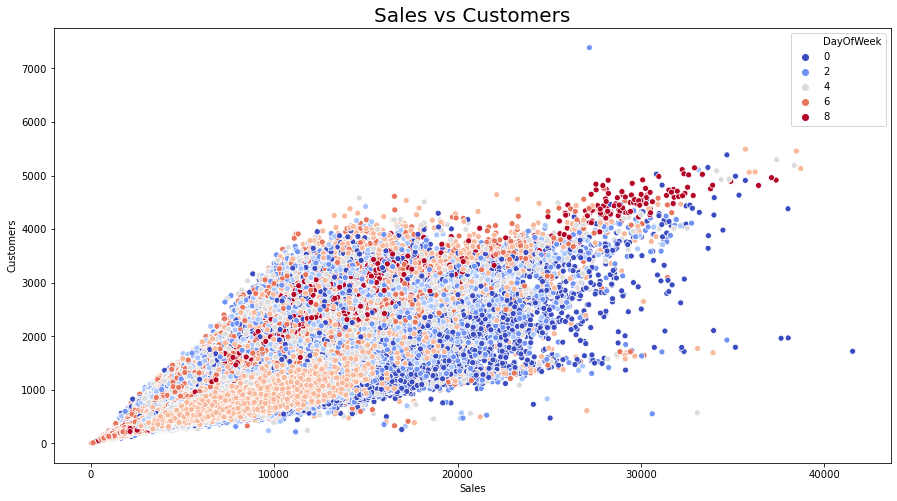

6    144052
2    143955
3    141922
5    138633
1    137557
4    134626
7      3593
Name: DayOfWeek, dtype: int64


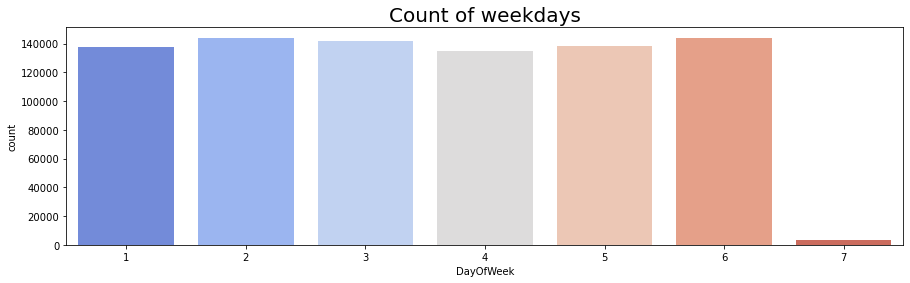

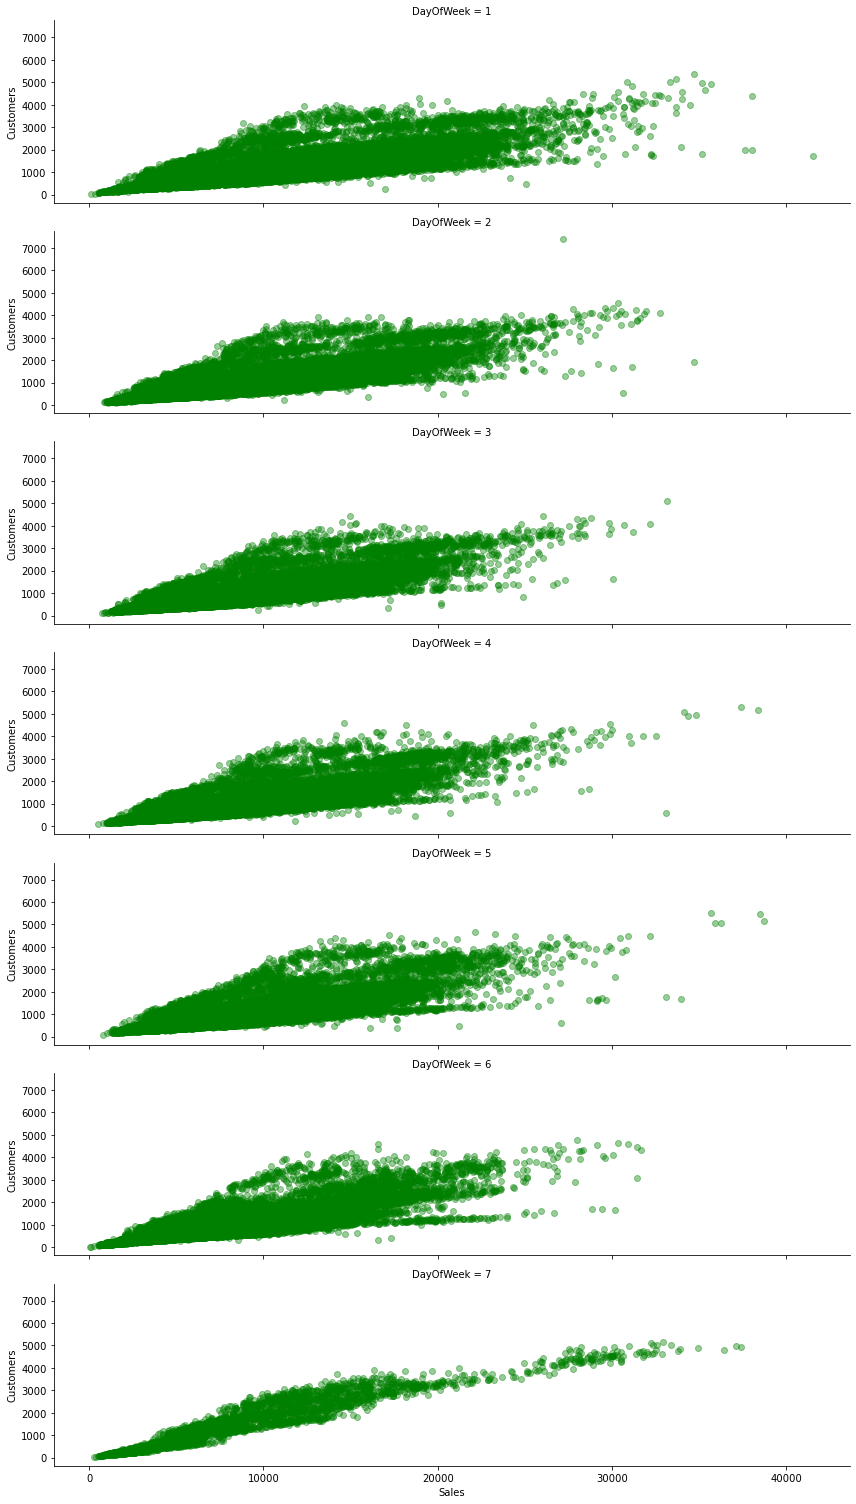

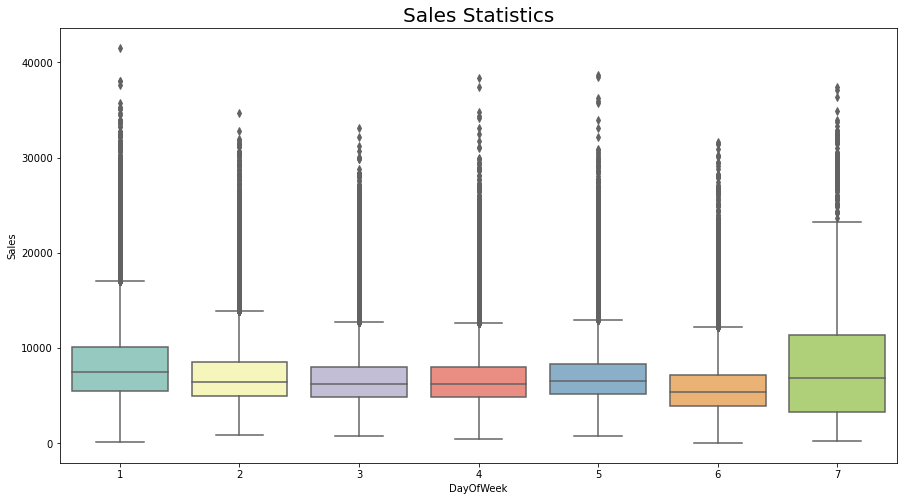

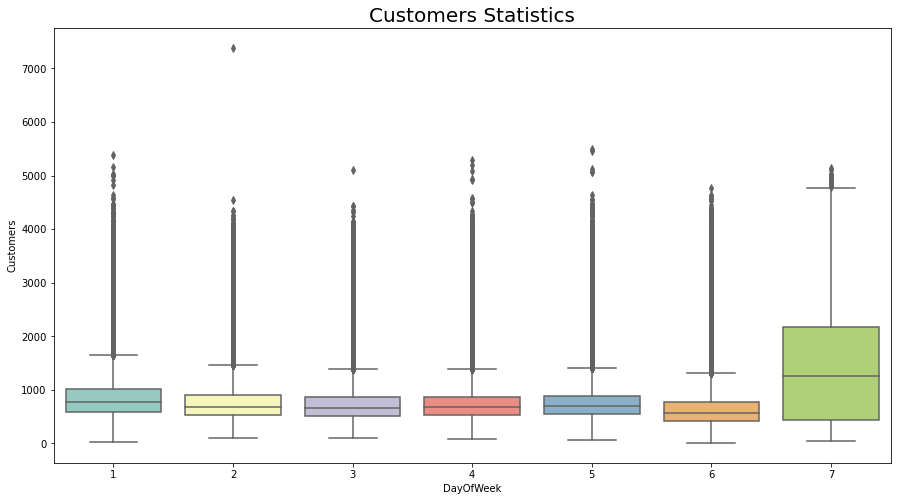

In [16]:
 # Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=train,hue='DayOfWeek',palette='coolwarm')
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# Count of Weekdays 
plt.figure(figsize=(15,4))
print(train['DayOfWeek'].value_counts())
sns.countplot('DayOfWeek',data=train,palette='coolwarm')
plt.title('Count of weekdays',fontdict={'fontsize':20})
plt.show()

# Weekdays wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='DayOfWeek',data=train,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='green',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(15,8))
sns.boxplot(y='Sales',x='DayOfWeek',data=train,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()


# Boxplot - "Customers"
plt.figure(figsize=(15,8))
sns.boxplot(y='Customers',x='DayOfWeek',data=train,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

* The 7th day of week has very less variability as compare to other days of week
* The count of 7th days is very less as compare to other days but the average sales and average number of customers are pretty much high. One possible reason could be on sunday customers comes for a specific commodity as an essential need for survival

### 1.2 Visualization based on running Promo

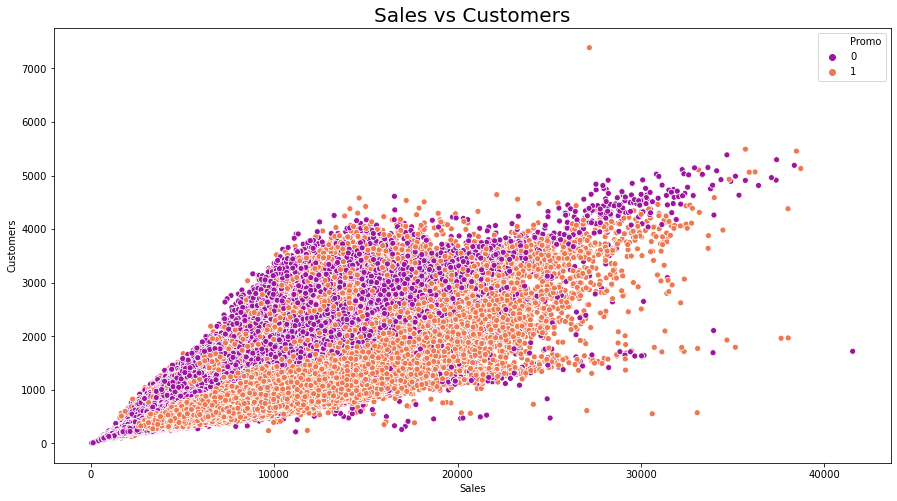

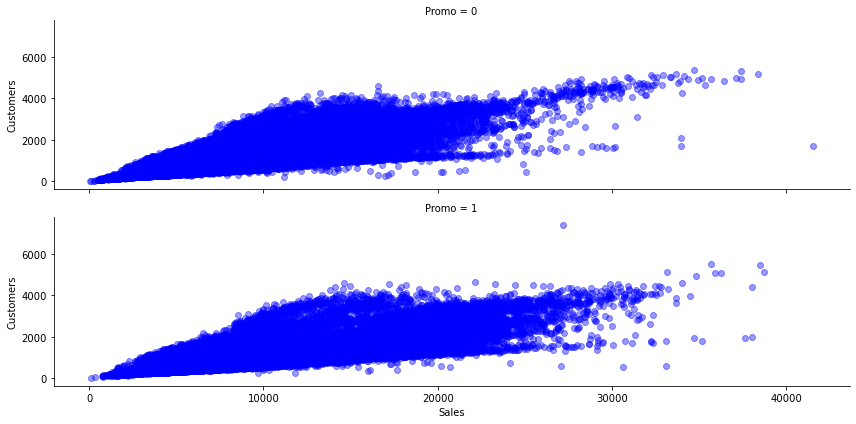

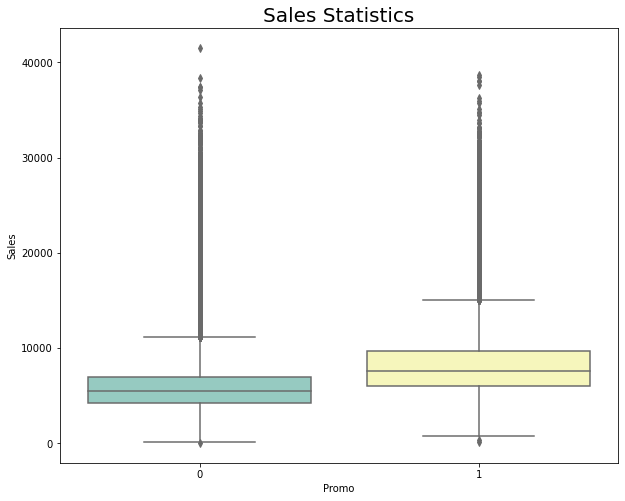

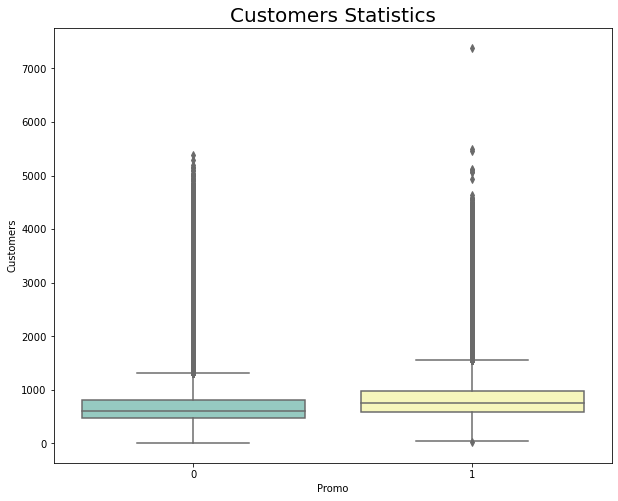

In [17]:
# Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=train,hue='Promo',palette='plasma')
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# Promo wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='Promo',data=train,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='blue',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Promo',data=train,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()

# Boxplot - "Customers"
plt.figure(figsize=(10,8))
sns.boxplot(y='Customers',x='Promo',data=train,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

* There is much difference in sale before and after running Promo. It indicates that promo have done a great job in increasing the sale
* Not much noticable difference is seen in number of customers visit to store. Promo idea was not capable to attract new customers but the buying quantity of existing old customers have increased, therefore overall the running of promo worked  

### 1.3 Visualization based on State Holidays 

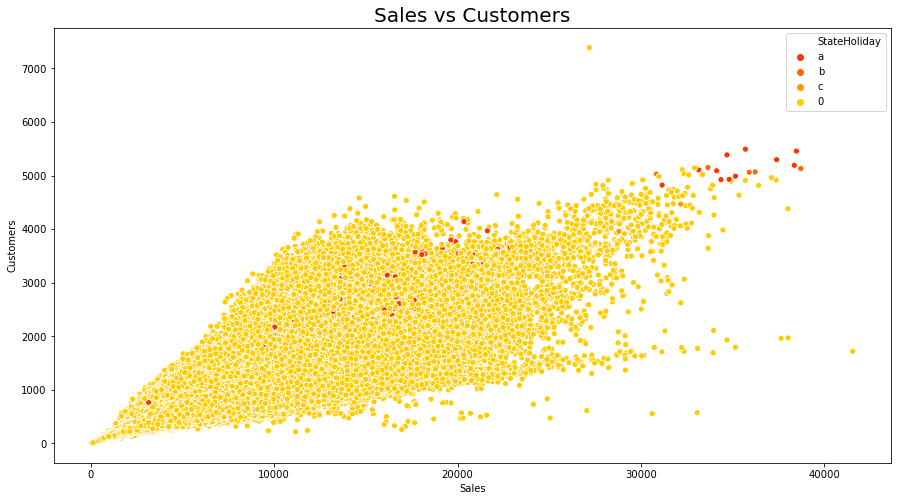

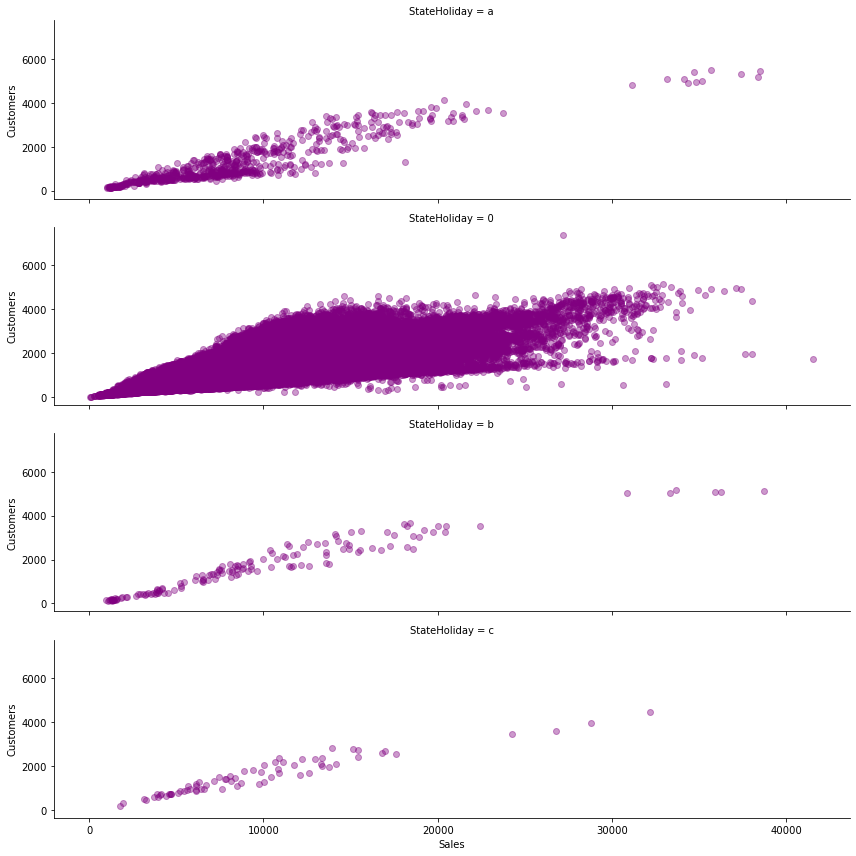

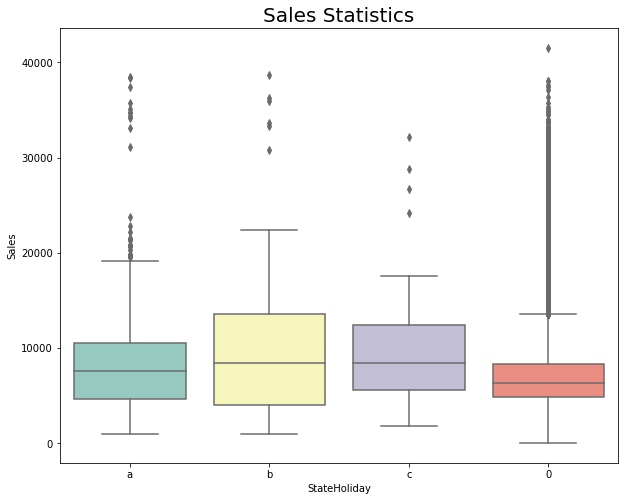

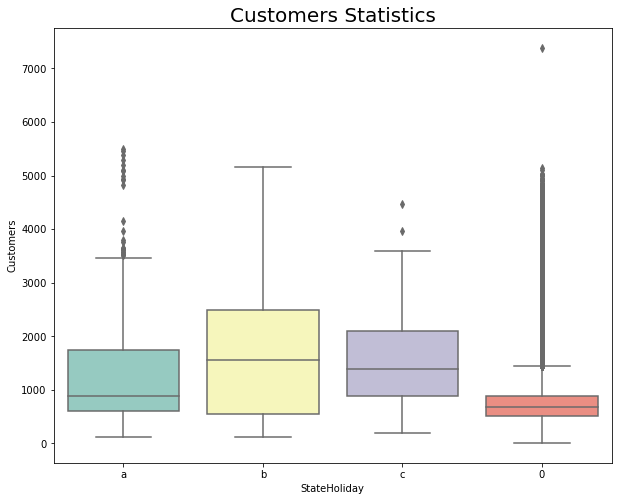

In [18]:
# Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=train,hue='StateHoliday',palette='autumn',hue_order=['a','b','c','0'])
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# State Holiday wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='StateHoliday',data=train,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='purple',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='StateHoliday',data=train,order=['a','b','c','0'],palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()

# Boxplot - "Customers"
plt.figure(figsize=(10,8))
sns.boxplot(y='Customers',x='StateHoliday',data=train,order=['a','b','c','0'],palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

* People are more often to buy more on Christmas and Easter festival, therefore sales and count of customers visit are more on this seasons
* But it is clearly seen the variation in public choice is less in these festival as people tend to buy particular range and type of product,where as the opposite behavior is been observed when there is no holiday

### 1.4 Visualization based on School Holidays 

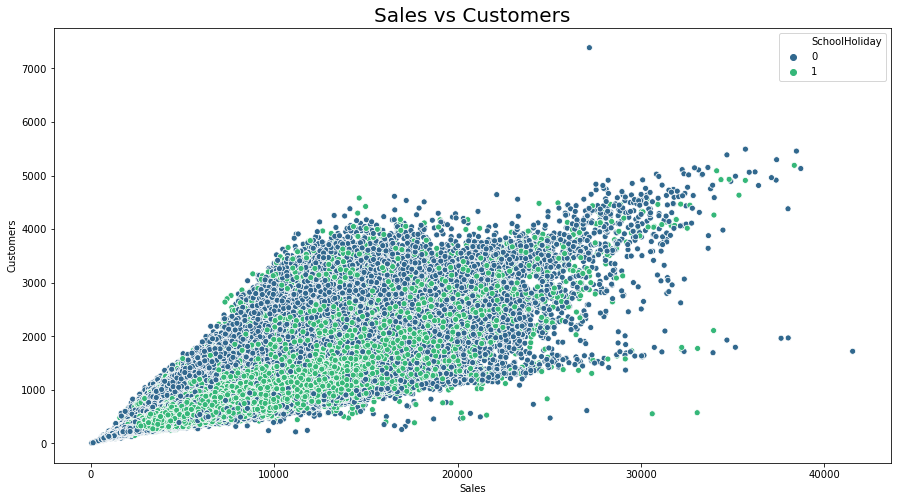

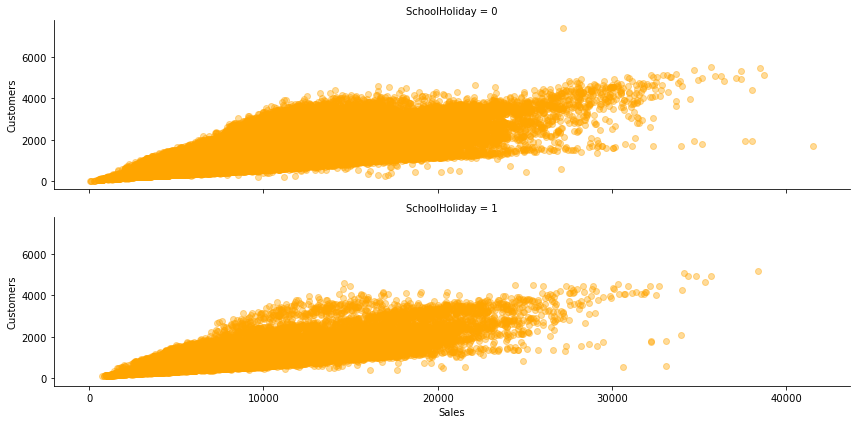

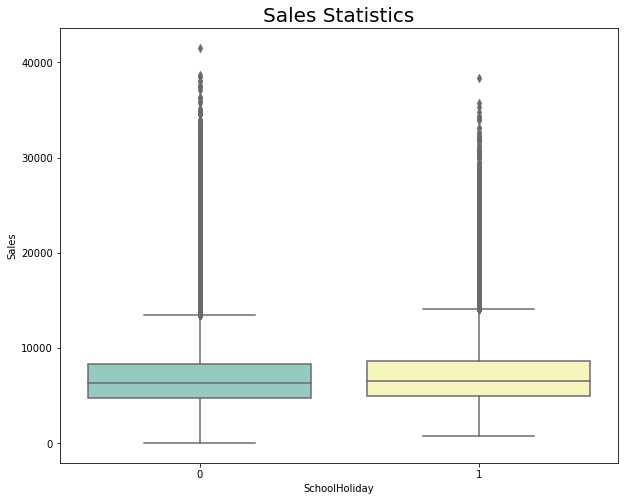

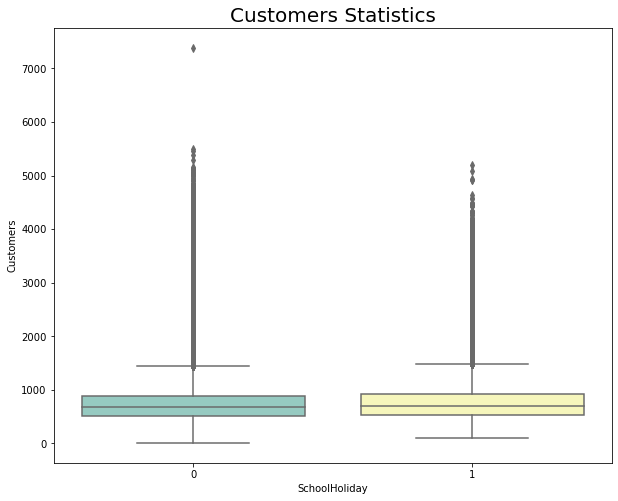

In [19]:
# Scatter plot "Sales Vs Customers"
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales',y='Customers',data=train,hue='SchoolHoliday',palette='viridis')
plt.title('Sales vs Customers',fontdict={'fontsize':20})
plt.show()

# State Holiday wise scatter plot between Sales and Customers
g=sns.FacetGrid(row='SchoolHoliday',data=train,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='orange',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='SchoolHoliday',data=train,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()

# Boxplot - "Customers"
plt.figure(figsize=(10,8))
sns.boxplot(y='Customers',x='SchoolHoliday',data=train,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

* Not much difference is observed by the closure of public schools

# 2. Feature Engineering

In [20]:
# Making new column of sales per customers 
train['SalesPerCustomer']=train['Sales']/train['Customers']
train['SalesPerCustomer']

0         4
1         7
2         5
3         6
4         4
         ..
844333   11
844334   14
844335   13
844336   10
844337    9
Name: SalesPerCustomer, Length: 844338, dtype: float64

In [21]:
# Checking the columns of store dataset
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


* There are lots of column having null values
* Some columns are not having right format data, so need to take care of it

In [22]:
# Converting Promo2 column data from integer to category type
store['Promo2']=store['Promo2'].astype(object)
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                        object
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [23]:
# Checking the unique values of category columns
for i in store.columns[store.dtypes=='object']:
    print(i,':',store[i].unique(),'\n')

StoreType : ['c' 'a' 'd' 'b'] 

Assortment : ['a' 'c' 'b'] 

Promo2 : [0 1] 

PromoInterval : [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec'] 



* Dataset is pretty much clear

## 2.3 Creating Dataframe - "avg_store" and merging with store dataset for further analysis

In [24]:
pd.options.display.float_format='{:.3f}'.format # in order to show number upto 3 decimal place

# avg_store Dataframe containing columns : 'Average Sales','Average Customers','Average Sales Per Customer'
avg_store=train.groupby('Store')[['Sales','Customers','SalesPerCustomer']].mean()
avg_store.rename(columns=lambda x : 'Avg_' + x,inplace=True)
avg_store.reset_index(inplace=True)

# Adding column Max_Customers(containing maximum value of customers) to avg_store Dataframe 
Max_customer=train.groupby('Store')['Customers'].max()
avg_store=pd.merge(avg_store,Max_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Max_Customers'},inplace=True)

# Adding column Min_Customers(containing mimimum value of customers) to avg_store Dataframe 
Min_customer=train.groupby('Store')['Customers'].min()
avg_store=pd.merge(avg_store,Min_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Min_Customers'},inplace=True)

# Adding column Std_Customers(containing Standard Deviation value of customers) to avg_store Dataframe 
Std_customer=train.groupby('Store')['Customers'].std()
avg_store=pd.merge(avg_store,Std_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Std_Customers'},inplace=True)

# Adding column Med_Customers(containing Median value of customers) to avg_store Dataframe 
Med_customer=train.groupby('Store')['Customers'].median()
avg_store=pd.merge(avg_store,Med_customer,how='inner',on='Store')
avg_store.rename(columns={'Customers':'Med_Customers'},inplace=True)

avg_store.head()

# In order to capture all the variability of customer columns, these much columns are made 

,Store,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers
0,1,4759.096,564.050,8.393,1130,298,93.707,550.000
1,2,4953.901,583.999,8.408,1164,230,155.374,575.500
2,3,6942.569,750.077,9.118,1579,381,170.280,744.000
3,4,9638.402,1321.753,7.250,2216,856,198.348,1301.500
4,5,4676.275,537.340,8.611,1081,180,165.605,564.000


In [25]:
# Merging avg_store with store
store=pd.merge(store,avg_store,how='inner',on='Store')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers
0,1,c,a,1270.000,9.000,2008.000,0,nan,nan,NaN,4759.096,564.050,8.393,1130,298,93.707,550.000
1,2,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct",4953.901,583.999,8.408,1164,230,155.374,575.500
2,3,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct",6942.569,750.077,9.118,1579,381,170.280,744.000
3,4,c,c,620.000,9.000,2009.000,0,nan,nan,NaN,9638.402,1321.753,7.250,2216,856,198.348,1301.500
4,5,a,a,29910.000,4.000,2015.000,0,nan,nan,NaN,4676.275,537.340,8.611,1081,180,165.605,564.000


In [26]:
# Removing missing values in CompetitionDistance column
index=store[store['CompetitionDistance'].isnull()].index
store.loc[index,'CompetitionDistance']=0
store['CompetitionDistance'].isnull().any() # for checking

False

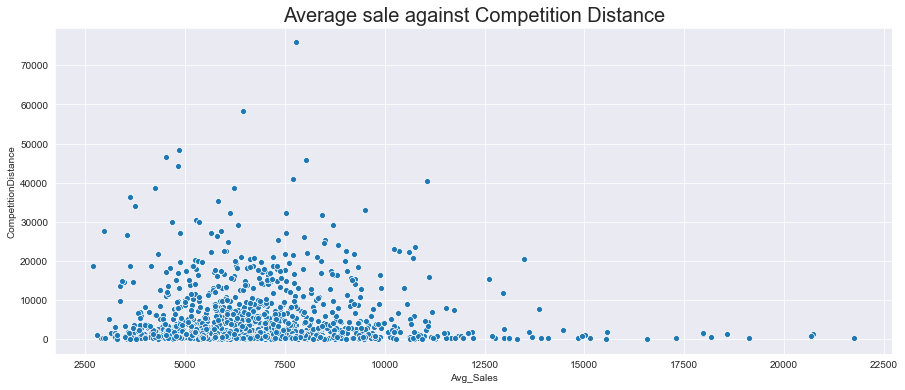

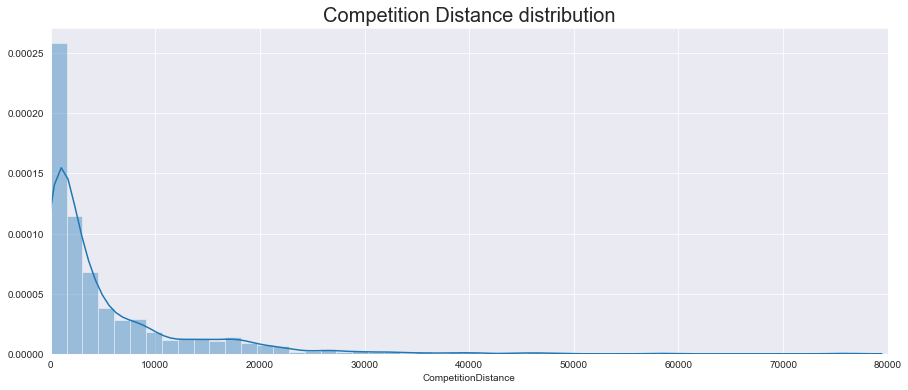

In [27]:
# Scatter plot - Average sale against Competition Distance
plt.figure(figsize=(15,6))
sns.set_style('darkgrid')
sns.scatterplot(x='Avg_Sales',y='CompetitionDistance',data=store)
plt.title('Average sale against Competition Distance',fontdict={'fontsize':20})
plt.show()

# Visualization of Competition Distance data
plt.figure(figsize=(15,6))
sns.distplot(store['CompetitionDistance'])
plt.title('Competition Distance distribution',fontdict={'fontsize':20})
plt.xlim(0,80000)
plt.show()

* It seens there are less competitor's store near to Rossman's store
* Even though many competitor's are near to Rossman's store, the sale is far good enough to beat the compoetition. May be this is because good service quality, better behaviour towards customers and last but not least is the quality of product.

In [28]:
# unique value check 

print('CompetitionOpenSinceMonth :',store['CompetitionOpenSinceMonth'].unique(),'\n')

print('CompetitionOpenSinceYear :',store['CompetitionOpenSinceYear'].unique(),'\n')

print('Promo2SinceWeek :',store['Promo2SinceWeek'].unique(),'\n')

print('Promo2SinceYear :',store['Promo2SinceYear'].unique())

CompetitionOpenSinceMonth : [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.] 

CompetitionOpenSinceYear : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 

Promo2SinceWeek : [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 

Promo2SinceYear : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]


In [29]:
# Getting free from missing values

index=store[(store['CompetitionOpenSinceMonth'].isnull())&(store['CompetitionOpenSinceYear'].isnull())].index
store.loc[index,['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]=0

index=store[(store['Promo2SinceWeek'].isnull())&(store['Promo2SinceYear'].isnull())&(store['Promo2']==0)].index
store.loc[index,['Promo2SinceWeek','Promo2SinceYear']]=0

store[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']].isnull().any() # To check

CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2SinceWeek              False
Promo2SinceYear              False
dtype: bool

In [30]:
# Converting from float into integer type
store[['CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear',
       'Promo2SinceWeek',
       'Promo2SinceYear']]=store[['CompetitionOpenSinceMonth',
                                  'CompetitionOpenSinceYear',
                                  'Promo2SinceWeek',
                                  'Promo2SinceYear']].astype(int)

store[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']].dtypes # To check

CompetitionOpenSinceMonth    int32
CompetitionOpenSinceYear     int32
Promo2SinceWeek              int32
Promo2SinceYear              int32
dtype: object

In [31]:
# Setting Promo Interval equal to zero for those who are not continuing Promo and for missing values
index=store[(store['Promo2']==0)&(store['PromoInterval'].isnull().any())].index
store.loc[index,'PromoInterval']=0

store['PromoInterval'].isnull().any() # To check

False

In [32]:
# Last check in columns of store
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int32  
 5   CompetitionOpenSinceYear   1115 non-null   int32  
 6   Promo2                     1115 non-null   object 
 7   Promo2SinceWeek            1115 non-null   int32  
 8   Promo2SinceYear            1115 non-null   int32  
 9   PromoInterval              1115 non-null   object 
 10  Avg_Sales                  1115 non-null   float64
 11  Avg_Customers              1115 non-null   float64
 12  Avg_SalesPerCustomer       1115 non-null   float64
 13  Max_Customers              1115 non-null   int64

* The data is clean and free from missing values

## 2.4 Visualization based on Store type

<Figure size 1080x576 with 0 Axes>

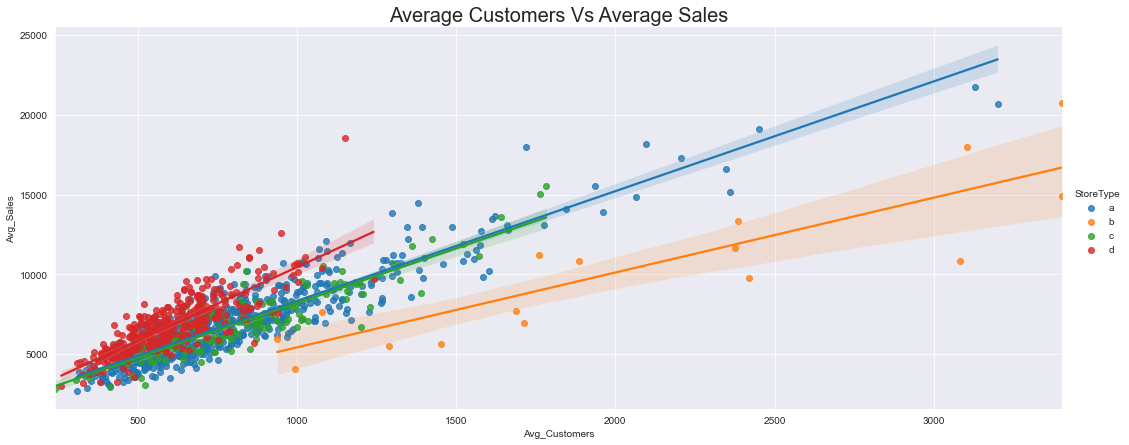

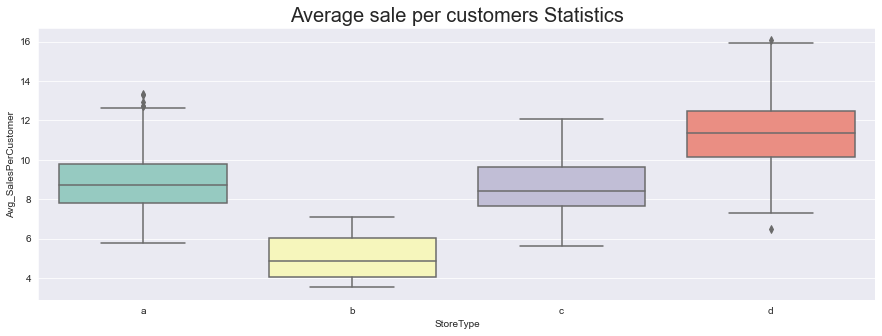

In [33]:
# scatter plot - Average Customers against Average Sales
plt.figure(figsize=(15,8))
sns.lmplot(x='Avg_Customers',y='Avg_Sales',hue='StoreType',data=store,hue_order=['a','b','c','d'],height=6,aspect=2.5)
plt.title('Average Customers Vs Average Sales', fontdict={'fontsize':20})
plt.show()

# boxplot - Average sale per customers 
plt.figure(figsize=(15,5))
sns.boxplot(x='StoreType',y='Avg_SalesPerCustomer',data=store,order=['a','b','c','d'],palette='Set3')
plt.title('Average sale per customers Statistics', fontdict={'fontsize':20})
plt.show()

* Store type d is having much higher sale but the variability is very less as people are buying one particular set of products 
* Store type a and c are same sales but both are less than d type
* The least one is b type store and its shows large variability. May be this type of store is located in rural or suburban area 
* As expected the sales rate of d type is higher than a and c type and b type have very less sales rate 

## 2.5 Visualization based on Assortment

<Figure size 1080x576 with 0 Axes>

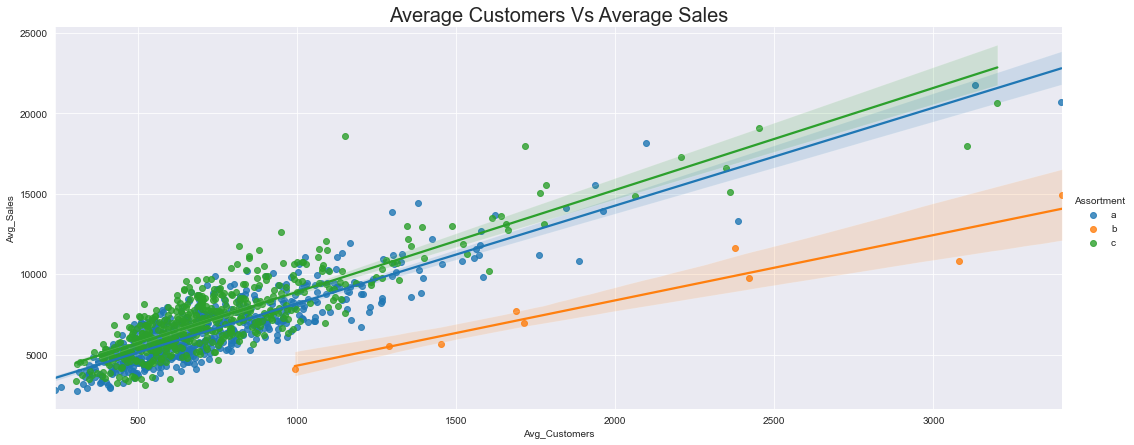

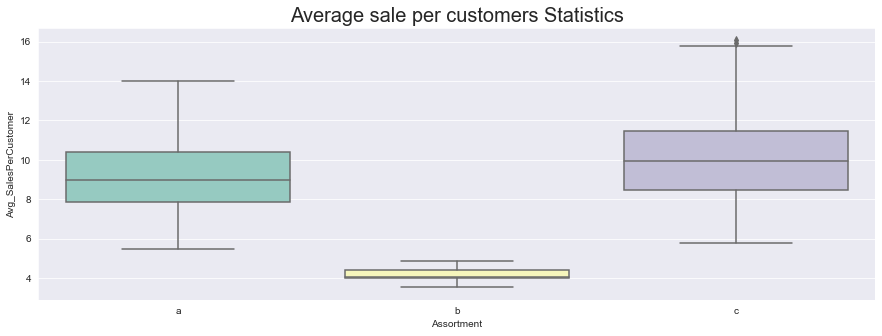

In [34]:
# scatter plot - Average Customers against Average Sales
plt.figure(figsize=(15,8))
sns.lmplot(x='Avg_Customers',y='Avg_Sales',hue='Assortment',data=store,hue_order=['a','b','c'],height=6,aspect=2.5)
plt.title('Average Customers Vs Average Sales', fontdict={'fontsize':20})
plt.show()

# boxplot - Average sale per customers
plt.figure(figsize=(15,5))
sns.boxplot(x='Assortment',y='Avg_SalesPerCustomer',data=store,order=['a','b','c'],palette='Set3')
plt.title('Average sale per customers Statistics', fontdict={'fontsize':20})
plt.show()

* It is quite interesting to observe that the line of assortment type a and c are almost parallel, ie. both are having the same average number of customers but the sales are higher in type c
* Also the sales rate is highest in type c

## 2.6 Visualization based on whether the Promo is continuing 

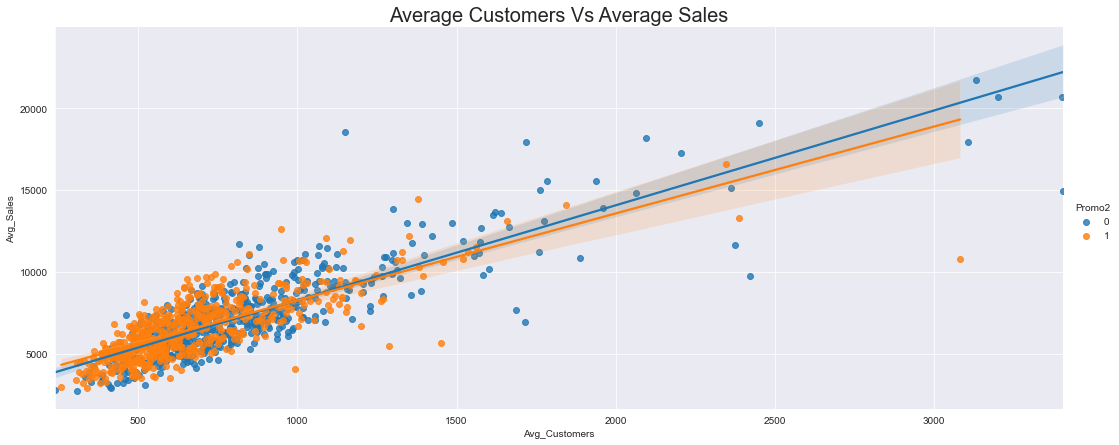

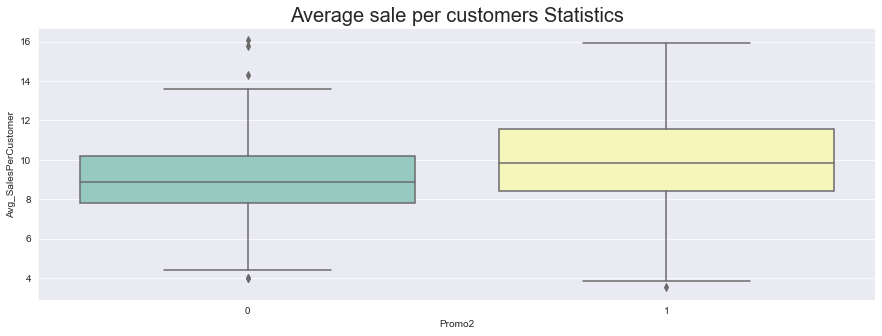

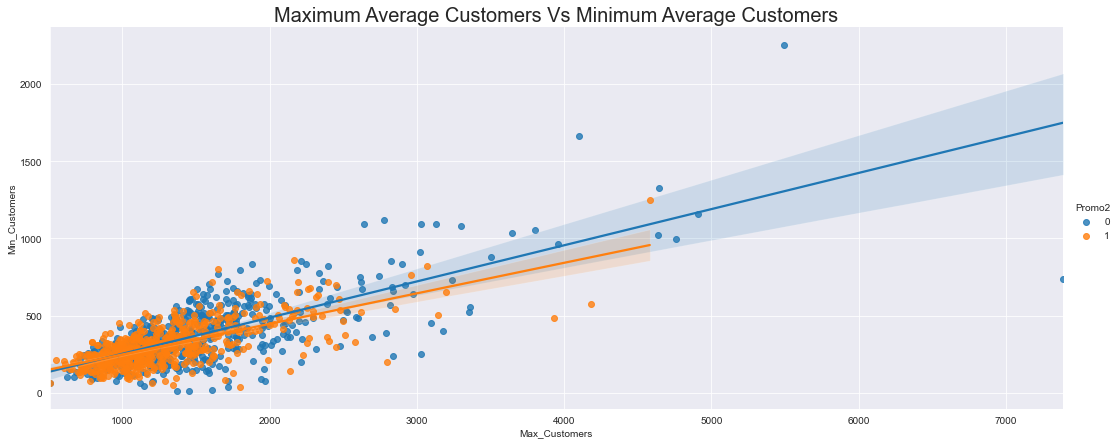

In [35]:
# scatter plot - Average Customers against Average Sales
sns.lmplot(x='Avg_Customers',y='Avg_Sales',hue='Promo2',data=store,height=6,aspect=2.5)
plt.title('Average Customers Vs Average Sales', fontdict={'fontsize':20})
plt.show()

# boxplot - Average sale per customers
plt.figure(figsize=(15,5))
sns.boxplot(x='Promo2',y='Avg_SalesPerCustomer',data=store,palette='Set3')
plt.title('Average sale per customers Statistics', fontdict={'fontsize':20})
plt.show()

# scatter plot - Maximum Average Customers against Minimum Average Customers
sns.lmplot(x='Max_Customers',y='Min_Customers',hue='Promo2',data=store,height=6,aspect=2.5)
plt.title('Maximum Average Customers Vs Minimum Average Customers', fontdict={'fontsize':20})
plt.show()

* In the first figure : the line at the begining overlaps each other but as its moves further it diverge from each other with 0 assigned line showing more sales for the same number of customers 
* The box plot shows the sales rate is high for those store who are continuing the promo but the difference is narrow 
* In the last figure : there is still divergence in line and the mimimum number of customers is less for the 1 assigned line as compare to 0 assigned one 
* this indicates the continuing of advertisements and promo is not a good idea as people are getting bored with the same promo.

## 2.7 Visualization based on Promo Interval

<Figure size 1080x576 with 0 Axes>

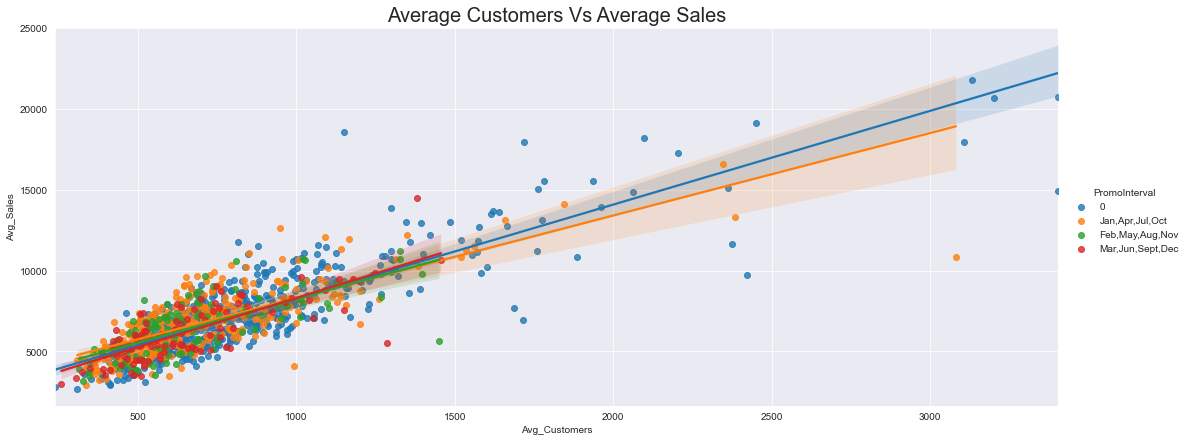

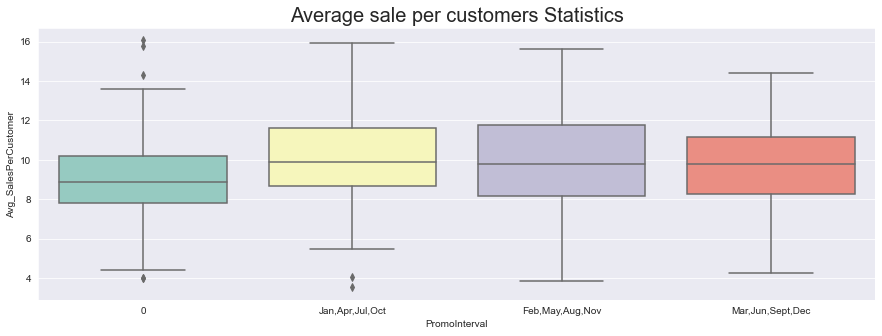

In [36]:
# scatter plot - Average Customers against Average Sales
plt.figure(figsize=(15,8))
sns.lmplot(x='Avg_Customers',y='Avg_Sales',hue='PromoInterval',data=store,height=6,aspect=2.5)
plt.title('Average Customers Vs Average Sales', fontdict={'fontsize':20})
plt.show()

# boxplot - Average sale per customers
plt.figure(figsize=(15,5))
sns.boxplot(x='PromoInterval',y='Avg_SalesPerCustomer',data=store,palette='Set3')
plt.title('Average sale per customers Statistics', fontdict={'fontsize':20})
plt.show()

* The sales rate are almost same 

## 2.8 Table_3 : Average sales, average number of customers and average sales per customer based on StoreType, Assortment and Promo Interval.

In [72]:
Table_3=pd.pivot_table(data=store,index=['StoreType','Assortment','PromoInterval'],
               values=['Avg_Sales','Avg_Customers','Avg_SalesPerCustomer'],aggfunc='mean').round(0)

Table_3.iplot(kind='bar',y=['Avg_Sales','Avg_Customers'],title='Average Sales and Average Customers',
              xTitle='(StoreType,Assortment,Assortment)')

Table_3.iplot(y='Avg_SalesPerCustomer',title='Average Sales per customers',xTitle='(StoreType,Assortment,Assortment)')

Table_3

Avg_Customers  Avg_Sales  \
StoreType Assortment PromoInterval                                
a         a          0                           806       6720   
                     Feb,May,Aug,Nov             722       6150   
                     Jan,Apr,Jul,Oct             692       6382   
                     Mar,Jun,Sept,Dec            730       6430   
          c          0                           915       7955   
                     Feb,May,Aug,Nov             753       7108   
                     Jan,Apr,Jul,Oct             841       7606   
                     Mar,Jun,Sept,Dec            680       6116   
b         a          0                          1680      10600   
                     Jan,Apr,Jul,Oct            2385      13314   
          b          0                          2320      10193   
                     Feb,May,Aug,Nov            1451       5651   
                     Jan,Apr,Jul,Oct            2037       7448   
                     Mar,Jun,Sept,Dec           1288       5511   
          c          0                          3105      17970   
c         a          0                           913       7252   
                     Feb,May,Aug,Nov             603       5502   
                     Jan,Apr,Jul,Oct             745       6234   
                     Mar,Jun,Sept,Dec            924       7546   
          c          0                           937       8125   
                     Feb,May,Aug,Nov             632       5673   
                     Jan,Apr,Jul,Oct             632       6037   
                     Mar,Jun,Sept,Dec            644       6010   
d         a          0                           651       6924   
                     Feb,May,Aug,Nov             539       6160   
                     Jan,Apr,Jul,Oct             543       6200   
                     Mar,Jun,Sept,Dec            507       5675   
          c          0                           679       7325   
                     Feb,May,Aug,Nov             579       7173   
                     Jan,Apr,Jul,Oct             584       7013   
                     Mar,Jun,Sept,Dec            522       6004   

                                       Avg_SalesPerCustomer  
StoreType Assortment PromoInterval                           
a         a          0                                    8  
                     Feb,May,Aug,Nov                      9  
                     Jan,Apr,Jul,Oct                      9  
                     Mar,Jun,Sept,Dec                     9  
          c          0                                    9  
                     Feb,May,Aug,Nov                     10  
                     Jan,Apr,Jul,Oct                      9  
                     Mar,Jun,Sept,Dec                     9  
b         a          0                                    6  
                     Jan,Apr,Jul,Oct                      6  
          b          0                                    4  
                     Feb,May,Aug,Nov                      4  
                     Jan,Apr,Jul,Oct                      4  
                     Mar,Jun,Sept,Dec                     4  
          c          0                                    6  
c         a          0                                    8  
                     Feb,May,Aug,Nov                      9  
                     Jan,Apr,Jul,Oct                      8  
                     Mar,Jun,Sept,Dec                     8  
          c          0                                    9  
                     Feb,May,Aug,Nov                      9  
                     Jan,Apr,Jul,Oct                     10  
                     Mar,Jun,Sept,Dec                     9  
d         a          0                                   11  
                     Feb,May,Aug,Nov                     11  
                     Jan,Apr,Jul,Oct                     11  
                     Mar,Jun,Sept,Dec                    11  
          c          0       

* From the above table as well as figures it is clear that continuing promo is not helping the business, it does not matter on which month the promo was runned .
* The b type store is most effected as sales rate is lowest

## 2.9 Merging train and store dataset to form new train dataset containing all the attributes 

In [38]:
# Merging
new_train=pd.merge(train,store,how='left',on='Store')
print('New training dataset shape :',new_train.shape)
new_train.head()

New training dataset shape : (844338, 25)


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_Sales,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers
0,1097,2,2013-01-01,5961,1405,0,a,1,4.243,b,...,0,0,0,9744.600,2420.921,4.015,3804,1055,329.306,2460.000
1,85,2,2013-01-01,4220,619,0,a,1,6.817,b,...,0,0,0,7272.454,1015.401,7.120,1992,433,286.779,929.500
2,259,2,2013-01-01,6851,1444,0,a,1,4.744,b,...,0,0,0,11656.145,2374.844,4.884,3648,1033,370.452,2418.000
3,262,2,2013-01-01,17267,2875,0,a,1,6.006,b,...,0,0,0,20718.516,3402.011,6.057,5494,2255,580.749,3239.000
4,274,2,2013-01-01,3102,729,0,a,1,4.255,b,...,10,2013,"Jan,Apr,Jul,Oct",4070.828,992.741,4.035,1962,480,247.459,926.000


In [39]:
# Making new columns to show Date information separately 
new_train['Year']=new_train['Date'].dt.year
new_train['Month']=new_train['Date'].dt.month
new_train['Day']=new_train['Date'].dt.day
new_train['Week']=new_train['Date'].dt.week
new_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,StoreType,...,Avg_Customers,Avg_SalesPerCustomer,Max_Customers,Min_Customers,Std_Customers,Med_Customers,Year,Month,Day,Week
0,1097,2,2013-01-01,5961,1405,0,a,1,4.243,b,...,2420.921,4.015,3804,1055,329.306,2460.000,2013,1,1,1
1,85,2,2013-01-01,4220,619,0,a,1,6.817,b,...,1015.401,7.120,1992,433,286.779,929.500,2013,1,1,1
2,259,2,2013-01-01,6851,1444,0,a,1,4.744,b,...,2374.844,4.884,3648,1033,370.452,2418.000,2013,1,1,1
3,262,2,2013-01-01,17267,2875,0,a,1,6.006,b,...,3402.011,6.057,5494,2255,580.749,3239.000,2013,1,1,1
4,274,2,2013-01-01,3102,729,0,a,1,4.255,b,...,992.741,4.035,1962,480,247.459,926.000,2013,1,1,1


* 4 new columns were added

In [40]:
# Making column "MonthCompetitionOpen" which contains date information in months since the competition was opened 
new_train['MonthCompetitionOpen']=12*(new_train['Year']-new_train['CompetitionOpenSinceYear'])+\
new_train['Month']-new_train['CompetitionOpenSinceMonth']

new_train.loc[(new_train['CompetitionOpenSinceYear']==0),'MonthCompetitionOpen']=0
# Negative values indcate that the competitor's store was opened after the Rossman's store opening date.

In [41]:
# Making column "WeekPromoOpen" which contains date information in weeks since the promo is running
new_train['WeekPromoOpen']=52.14298*(new_train['Year']-new_train['Promo2SinceYear'])+\
new_train['Week']-new_train['Promo2SinceWeek']

new_train.loc[(new_train['Promo2SinceYear']==0),'WeekPromoOpen']=0

## 2.10 Visualization based on Months 

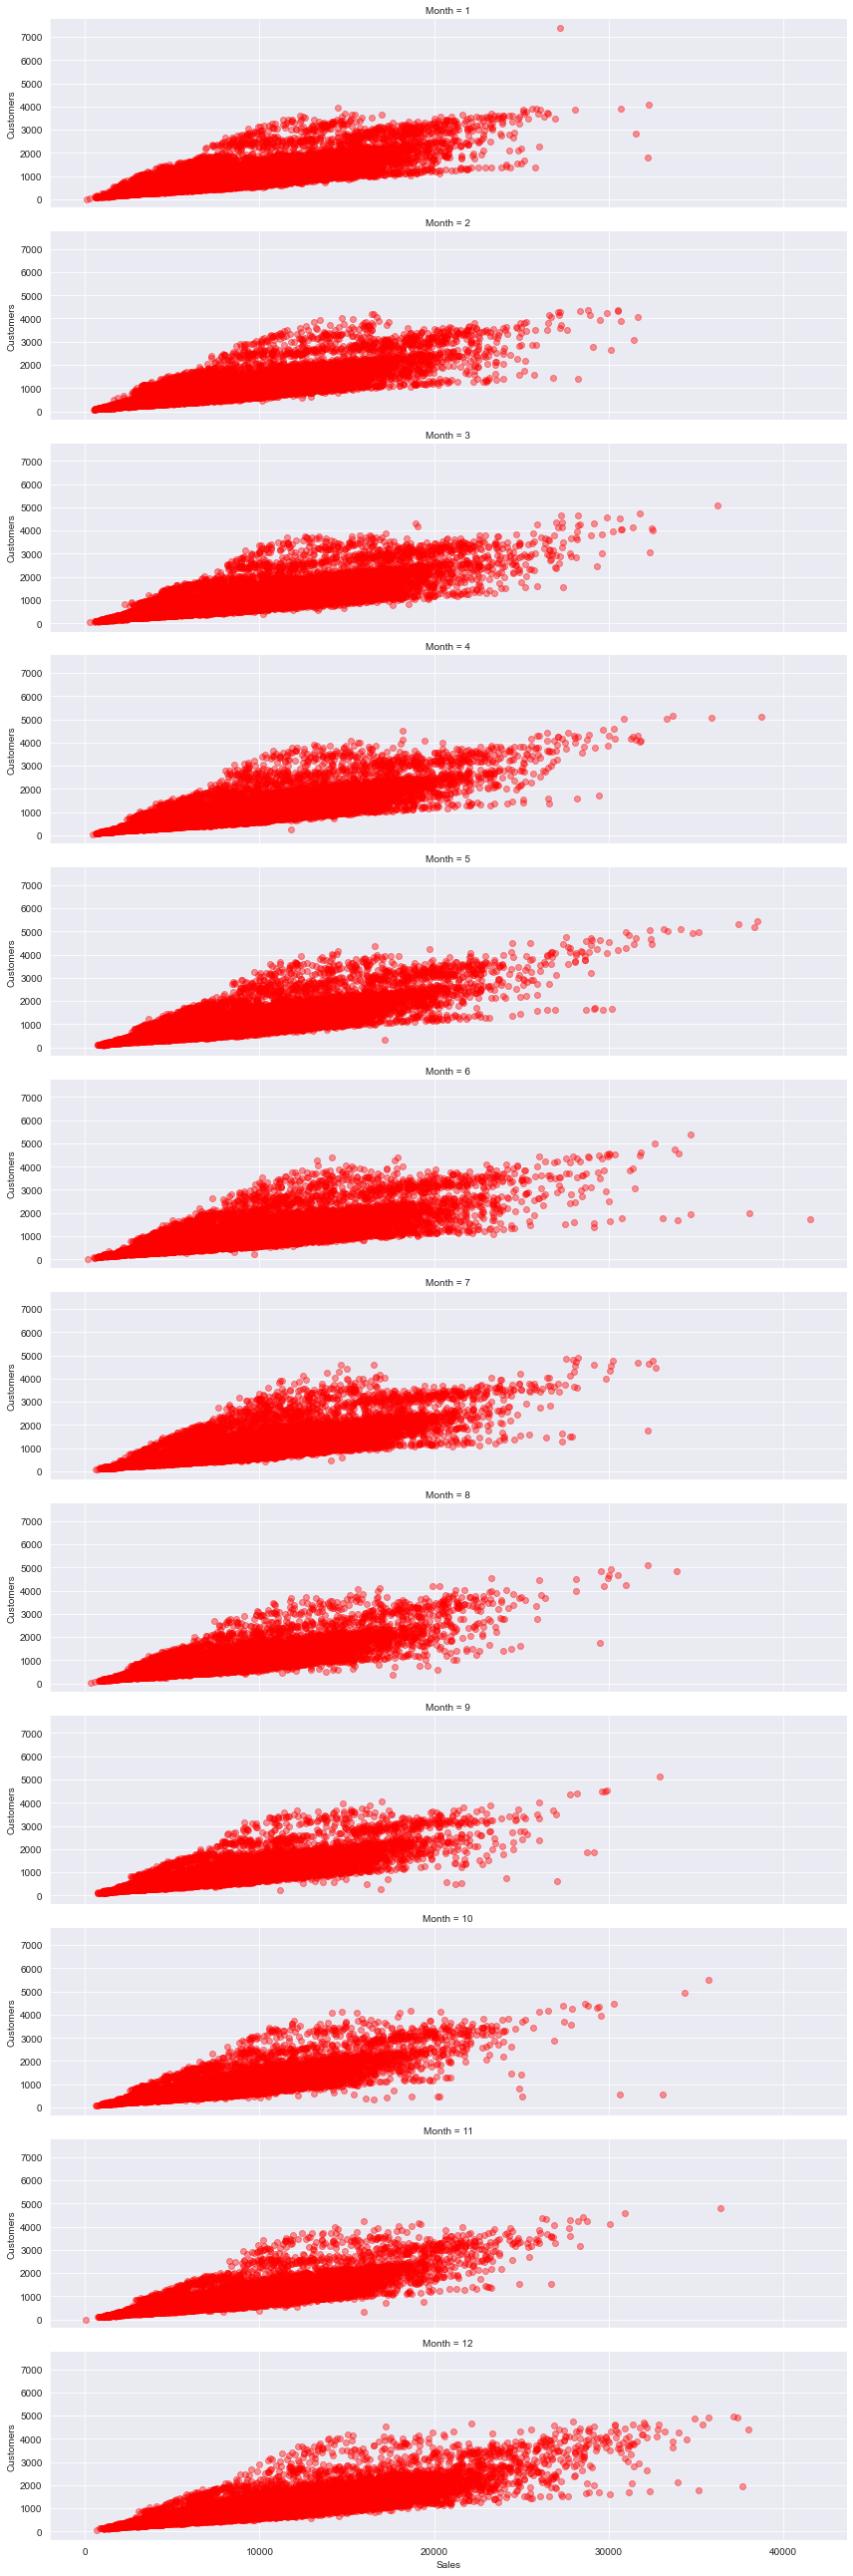

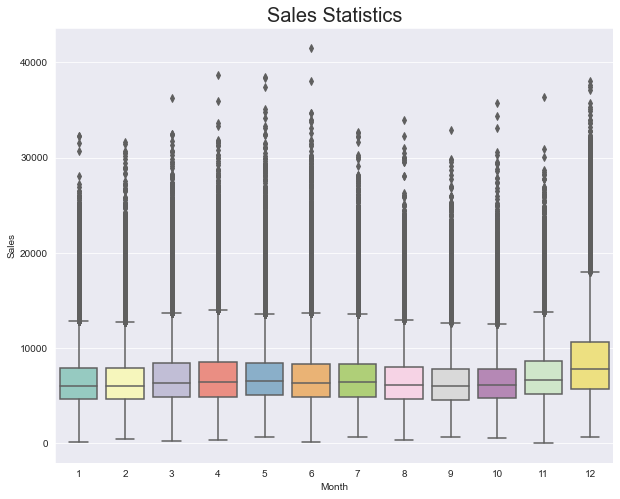

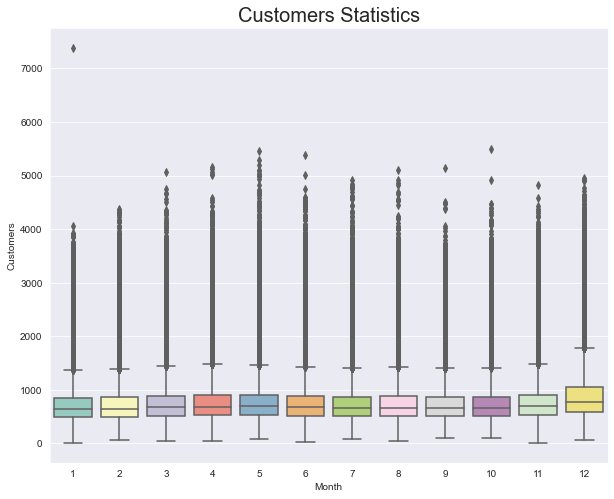

In [42]:
# scatter plot - Sales against Customers
g=sns.FacetGrid(row='Month',data=new_train,height=3,aspect=4)
g.map(plt.scatter,'Sales','Customers',color='red',alpha=0.4)
plt.show()

# Boxplot - "Sales"
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Month',data=new_train,palette='Set3')
plt.title('Sales Statistics',fontdict={'fontsize':20})
plt.show()

# Boxplot - "Customers"
plt.figure(figsize=(10,8))
sns.boxplot(y='Customers',x='Month',data=new_train,palette='Set3')
plt.title('Customers Statistics',fontdict={'fontsize':20})
plt.show()

* Now it is obvious that the month of November and December the sale and number of customers would be high
* Sales are also high in the summer season

In [43]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   SalesPerCustomer           844338 non-null  float64       
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        844338 non-null  float64 

In [44]:
# converting into integer type
new_train['Promo2']=new_train['Promo2'].astype(int)

In [45]:
"""Droping column customer because we are performing sales prediction and knowing the number of customers on particular store before actual
   sales happen is not possible"""
new_train.drop('Customers',axis=1,inplace=True)

# 3. Building and Implementing Machine Learning Models

## 3.1 Preparing dataset and Normalizing certain column data

In [46]:
# Making a new data set for model building
trainS=new_train[['Store', 'DayOfWeek','Sales','Promo',
       'StateHoliday', 'SchoolHoliday','StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval','Avg_Customers',
       'Max_Customers', 'Min_Customers',
       'Std_Customers', 'Med_Customers', 'Year', 'Month', 'Day', 'Week',
       'MonthCompetitionOpen', 'WeekPromoOpen']]
trainS.shape

(844338, 26)

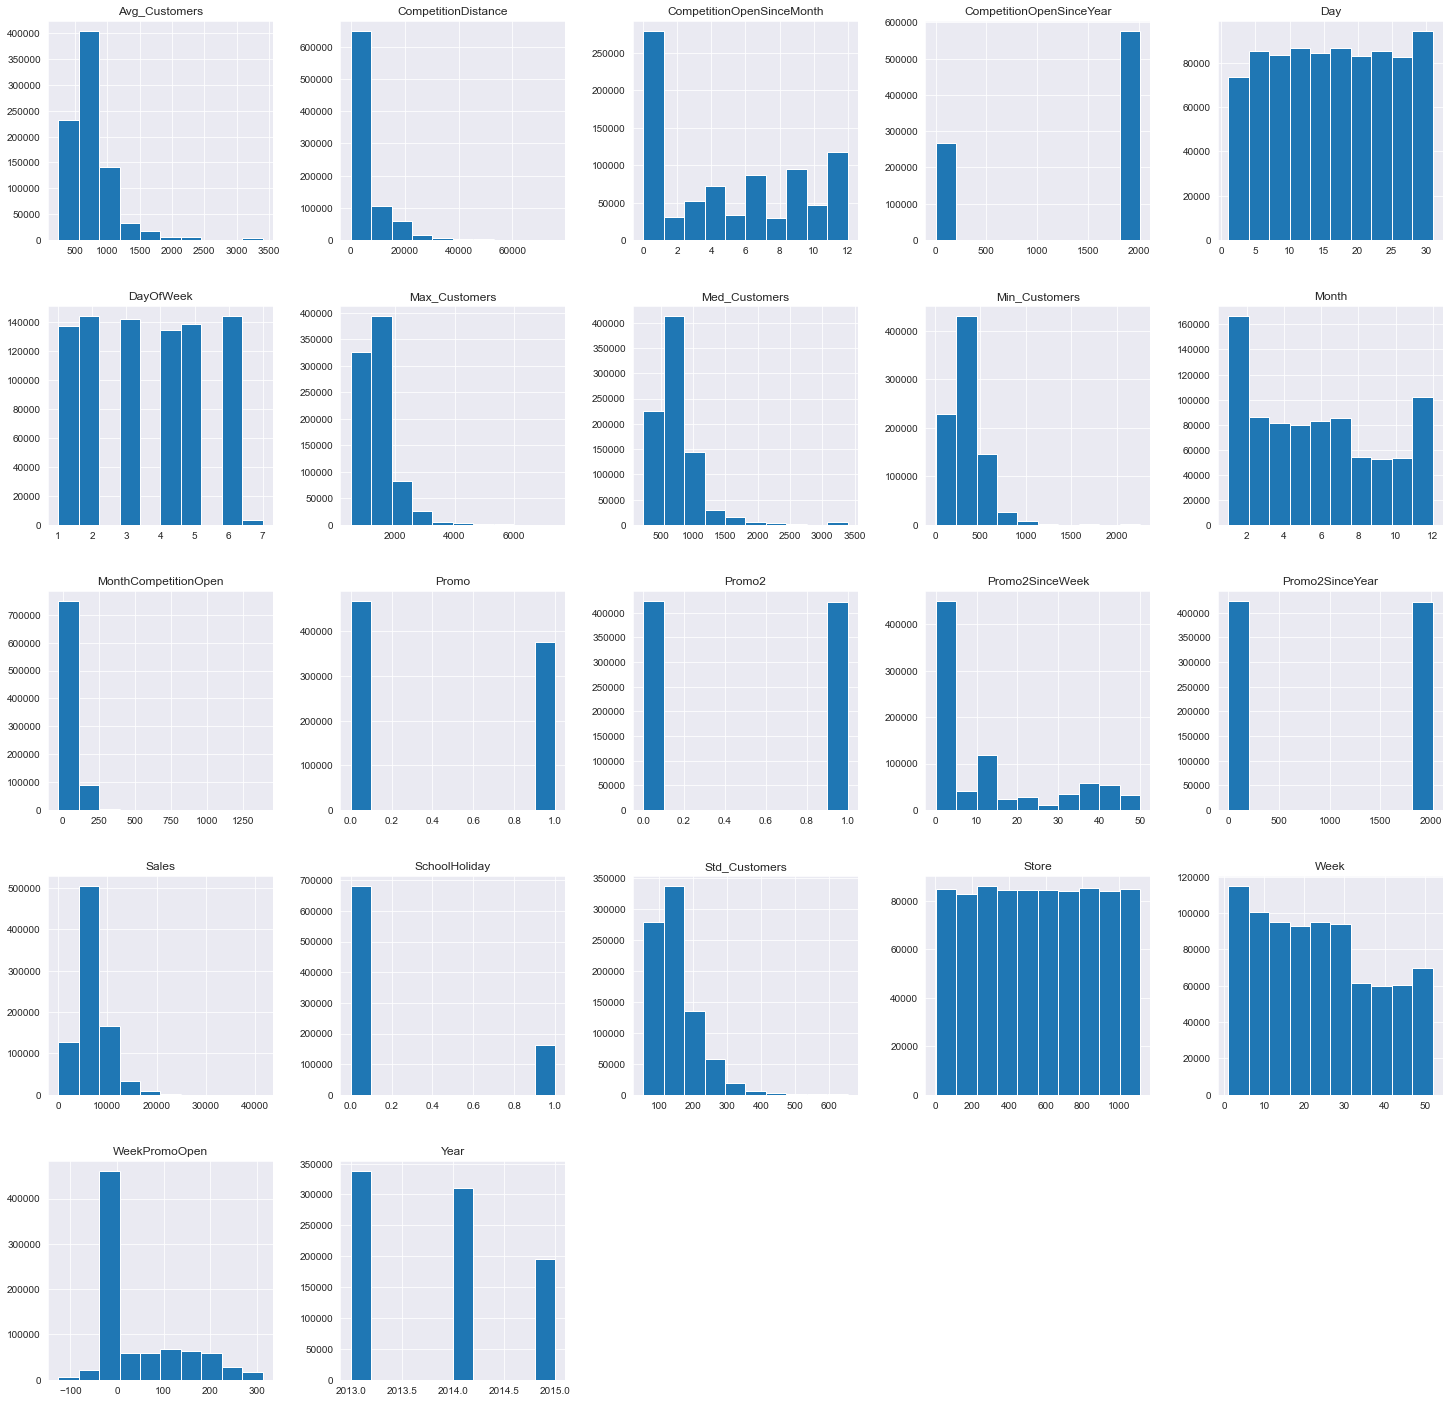

In [47]:
# Visualization to chech whether the data is distributed normally
trainS.hist(figsize=(25,25))
plt.show()

* Some of the columns data are positively skewed, therefore have to deal with it.
* This is not a necessary step but normally distributed data yields better result

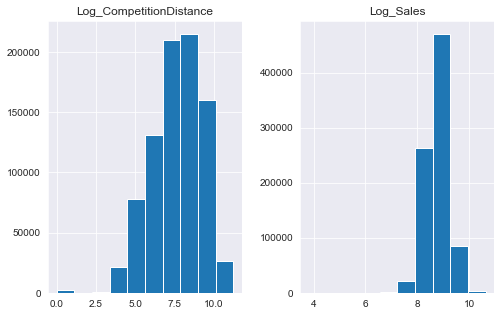

In [48]:
# Taking log transformation 
trainS['Log_Sales']=np.log(trainS['Sales'])

index=trainS[trainS['CompetitionDistance']==0].index
trainS['CompetitionDistance'][index]=1
trainS['Log_CompetitionDistance']=np.log(trainS['CompetitionDistance'])

trainS[['Log_Sales','Log_CompetitionDistance',]].hist(figsize=(8,5))
plt.show()

trainS.drop(['Sales','CompetitionDistance'],axis=1,inplace=True)

# Note : This is not a necessary step but doing this will redistribute the data in normal curve which is better for good prediction 

* Almost normally distributed 

In [49]:
# Getting dummies columns for categorical columns 
final_train=pd.get_dummies(data=trainS,columns=['StoreType','StateHoliday','Assortment','PromoInterval'])
final_train.shape

(844338, 37)

## 3.2 Model Building : Random Forest Regressor 

### 3.2.1 Spliting the dataset

In [50]:
# Spliting dataset into X and y 
X=final_train.drop('Log_Sales',axis=1)
y=final_train['Log_Sales']

# Spliting dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101) 

### 3.2.2 Creating and Training the model 

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=10,
                          criterion='mse',
                          max_features='sqrt',
                          oob_score=True,
                          n_jobs=5,
                          verbose=1,
                          random_state=101)

rfr.fit(X_train,y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:   11.5s finished


RandomForestRegressor(max_features='sqrt', n_estimators=10, n_jobs=5,
                      oob_score=True, random_state=101, verbose=1)

In [52]:
# Prediction
predict=rfr.predict(X_test)
predict

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.9s finished


array([8.60922618, 9.3680187 , 9.15056437, ..., 8.4900964 , 8.61037773,
       8.93847477])

### 3.2.3 Model Evaluation 

In [53]:
# Out of Bag score
print('oob score :',rfr.oob_score_)

oob score : -3.4574469137966917


In [54]:
# Root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(np.exp(y_test),np.exp(predict))
print('Root Mean Square Error {}'.format(sqrt(mse)))

Root Mean Square Error 898.3254177948655


In [55]:
# Import attributes according to model
pd.options.display.float_format='{:.5f}'.format
important_features=pd.DataFrame(rfr.feature_importances_,index=X_train.columns)
important_features.sort_values(by=0,ascending=False)

,0
Max_Customers,0.19648
Promo,0.14557
Avg_Customers,0.09331
Med_Customers,0.08754
Min_Customers,0.08280
DayOfWeek,0.07981
Day,0.04238
Std_Customers,0.03626
Week,0.03391
Log_CompetitionDistance,0.02176


In [69]:
pip install cufflinks --upgrade

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=d604af58211b7f7f46a924714421c7e77d187641321a625065c41d0763e768ec
  Stored in directory: c:\users\sumit\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [70]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [71]:
# Visualization of important features
important_features.sort_values(by=0,ascending=False).iplot(mode='markers',title='Important Attributes')

### 3.2.4 Predictions from Model

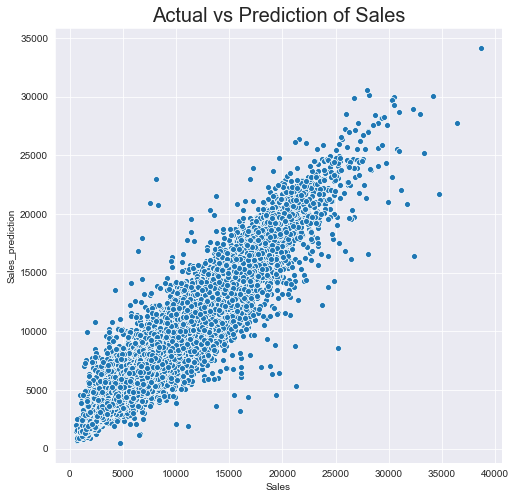

,Sales,Sales_prediction
0,4880.00000,5482.00000
1,11791.00000,11708.00000
2,10209.00000,9420.00000
3,4915.00000,4950.00000
4,6457.00000,7607.00000
...,...,...
126646,7222.00000,6850.00000
126647,10666.00000,8568.00000
126648,5990.00000,4866.00000
126649,6884.00000,5488.00000


In [57]:
prediction=pd.DataFrame(np.exp(y_test))
prediction['Sales_prediction']=np.exp(predict).round()
prediction.rename(columns={'Log_Sales':'Sales'},inplace=True)

# Visualization
plt.figure(figsize=(8,8))
sns.scatterplot(x='Sales',y='Sales_prediction',data=prediction)
plt.title('Actual vs Prediction of Sales',fontdict={'fontsize':20})
plt.show()

prediction.reset_index(inplace=True)
prediction.drop('index',axis=1,inplace=True)
prediction

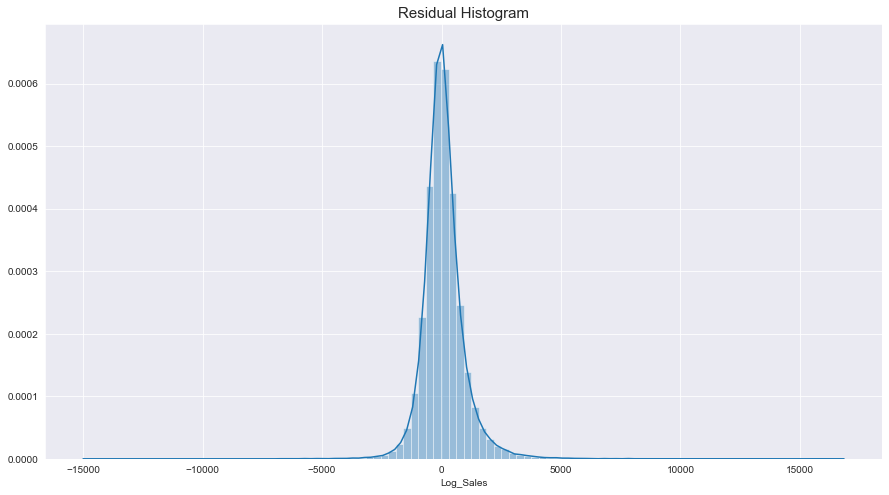

In [58]:
# Residual Histogram
plt.figure(figsize=(15,8))
sns.distplot((np.exp(y_test)-np.exp(predict)),bins=100)
plt.title('Residual Histogram',fontdict={'fontsize':15})
plt.show()

#### Further model can be enhanced by
* Droping some of the very low assigned weightage columns 
* Standard normalize scaling the whole dataset
* Hyper tuning the parameters 

#### Some of the code for hyper tuning the parameters using GridSearchCv

      from sklearn.model_selection import GridSearchCV
      from sklearn.ensemble import RandomForestRegressor

      rfr=RandomForestRegressor(random_state=101)

      param_grid=dict(n_estimators=np.arange(200,500,50),max_depth=np.arange(2,6,1),
                max_features=['auto','sqrt'],min_samples_leaf=[3,4,5],min_samples_split=[3,4,5])

      gridSearch=GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 4, n_jobs = 32,
                        verbose=1,scoring='neg_mean_squared_error')

      gridSearch.fit(X_train,y_train)
      gridSearch.best_param

* Using best parameter obtain by GridSearch to build again random forest model and making the prediction and evaluating the model based on root mean square error.

Note : I have not performed hypertuning because i have used maximum of provided ram by kaggle.

# 4. Test dataset prediction for submission

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [60]:
# Merging the store set
new_test=pd.merge(test,store,how='inner',on='Store')
new_test.drop(['Avg_Sales','Avg_SalesPerCustomer','Open'],axis=1,inplace=True)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Promo                      41088 non-null  int64  
 5   StateHoliday               41088 non-null  object 
 6   SchoolHoliday              41088 non-null  int64  
 7   StoreType                  41088 non-null  object 
 8   Assortment                 41088 non-null  object 
 9   CompetitionDistance        41088 non-null  float64
 10  CompetitionOpenSinceMonth  41088 non-null  int32  
 11  CompetitionOpenSinceYear   41088 non-null  int32  
 12  Promo2                     41088 non-null  object 
 13  Promo2SinceWeek            41088 non-null  int

In [61]:
# Making new columns to show Date information separately 
new_test['Year']=new_train['Date'].dt.year
new_test['Month']=new_train['Date'].dt.month
new_test['Day']=new_train['Date'].dt.day
new_test['Week']=new_train['Date'].dt.week
new_test.drop('Date',axis=1,inplace=True)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Promo                      41088 non-null  int64  
 4   StateHoliday               41088 non-null  object 
 5   SchoolHoliday              41088 non-null  int64  
 6   StoreType                  41088 non-null  object 
 7   Assortment                 41088 non-null  object 
 8   CompetitionDistance        41088 non-null  float64
 9   CompetitionOpenSinceMonth  41088 non-null  int32  
 10  CompetitionOpenSinceYear   41088 non-null  int32  
 11  Promo2                     41088 non-null  object 
 12  Promo2SinceWeek            41088 non-null  int32  
 13  Promo2SinceYear            41088 non-null  int

In [62]:
# Making column "MonthCompetitionOpen" which contains date information in months since the competition was opened 
new_test['MonthCompetitionOpen']=12*(new_test['Year']-new_test['CompetitionOpenSinceYear'])+\
new_test['Month']-new_test['CompetitionOpenSinceMonth']

new_test.loc[(new_test['CompetitionOpenSinceYear']==0),'MonthCompetitionOpen']=0
# Negative values indcate that the competitor's store was opened after the Rossman's store opening date.

# Making column "WeekPromoOpen" which contains date information in weeks since the promo is running
new_test['WeekPromoOpen']=52.14298*(new_test['Year']-new_test['Promo2SinceYear'])+\
new_test['Week']-new_test['Promo2SinceWeek']

new_test.loc[(new_test['Promo2SinceYear']==0),'WeekPromoOpen']=0

In [63]:
# Checking the categorical variable columns unique values
for i in new_test.columns[new_test.dtypes=='object']:
    print(i+':',new_test[i].unique())

StateHoliday: ['0' 'a']
StoreType: ['c' 'a' 'd' 'b']
Assortment: ['a' 'c' 'b']
Promo2: [0 1]
PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [64]:
# Converting into integer format
new_test['Promo2']=new_test['Promo2'].astype(int)

# Deleting Id column from new_test dataset
Id=new_test['Id']
new_test.drop('Id',axis=1,inplace=True)

# Getting dummy columns
new_test=pd.get_dummies(new_test)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Store                           41088 non-null  int64  
 1   DayOfWeek                       41088 non-null  int64  
 2   Promo                           41088 non-null  int64  
 3   SchoolHoliday                   41088 non-null  int64  
 4   CompetitionDistance             41088 non-null  float64
 5   CompetitionOpenSinceMonth       41088 non-null  int32  
 6   CompetitionOpenSinceYear        41088 non-null  int32  
 7   Promo2                          41088 non-null  int32  
 8   Promo2SinceWeek                 41088 non-null  int32  
 9   Promo2SinceYear                 41088 non-null  int32  
 10  Avg_Customers                   41088 non-null  float64
 11  Max_Customers                   41088 non-null  int64  
 12  Min_Customers                   

In [65]:
# Making new columns to match the numbers with the X_train columns
new_test['StateHoliday_b']=0
new_test['StateHoliday_c']=0
new_test=pd.get_dummies(new_test,columns=['StateHoliday_b','StateHoliday_c'])
new_test.rename(columns={'StateHoliday_b_0':'StateHoliday_b','StateHoliday_c_0':'StateHoliday_c'},inplace=True)
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Store                           41088 non-null  int64  
 1   DayOfWeek                       41088 non-null  int64  
 2   Promo                           41088 non-null  int64  
 3   SchoolHoliday                   41088 non-null  int64  
 4   CompetitionDistance             41088 non-null  float64
 5   CompetitionOpenSinceMonth       41088 non-null  int32  
 6   CompetitionOpenSinceYear        41088 non-null  int32  
 7   Promo2                          41088 non-null  int32  
 8   Promo2SinceWeek                 41088 non-null  int32  
 9   Promo2SinceYear                 41088 non-null  int32  
 10  Avg_Customers                   41088 non-null  float64
 11  Max_Customers                   41088 non-null  int64  
 12  Min_Customers                   

In [66]:
# Final prediction for submission

Sales=np.exp(rfr.predict(new_test))

pd.options.display.float_format='{:.0f}'.format
Final_submission=pd.DataFrame(Sales)
Final_submission['Id']=test['Id']
Final_submission.rename(columns={0:'Sales'},inplace=True)
Final_submission=Final_submission[['Id','Sales']]
Final_submission

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


,Id,Sales
0,1,4454
1,2,4491
2,3,4636
3,4,5561
4,5,3386
...,...,...
41083,41084,6182
41084,41085,6589
41085,41086,8597
41086,41087,6106


In [67]:
Final_submission.to_csv('Random_Forest_Regression_submission.csv',index=False)